### In this notebook I have using Predictive Inputation for imputing REPAYMENT_TENURE missing values in train_main_loan.csv
### key steps are:
#### 1. *Use the same wrangling functions as of part 1.1*
#### 2. *filtered a the train_all_loan according to the ACCOUNT_TYPE in train_main_all*
#### 3. *only selected the ongoing loan that have not been closed*
#### 4. *Essentially trained this model on 98000 (approx) datapoints*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_all_loan.csv')

def date_opened_to_month(df):
    # Convert 'DATE_OPENED' column to datetime
    df['DATE_OPENED'] = pd.to_datetime(df['DATE_OPENED'], format='%Y-%m-%d')  # Updated date format

    # Define the constant 'Reported_Date'
    constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')

    # Calculate the number of months until the constant_reported_date
    df['Months_Since_Opened'] = (constant_reported_date - df['DATE_OPENED']).dt.days // 30

    # Replace 'DATE_OPENED' with the calculated number of months
    df['DATE_OPENED'] = df['Months_Since_Opened']

    # Drop the 'Months_Since_Opened' column if you don't need it anymore
    df.drop(columns=['Months_Since_Opened'], inplace=True)
    
    # Rename 'DATE_OPENED' to 'MONTH_OPENED'
    df.rename(columns={'DATE_OPENED': 'MONTH_OPENED'}, inplace=True)

    return df

wrangled_df = date_opened_to_month(df)


In [189]:
def history_start_end_dates(df):
    # Convert 'PAYMENT_HISTORY_START_DATE' and 'PAYMENT_HISTORY_END_DATE' to datetime
    df['PAYMENT_HISTORY_START_DATE'] = pd.to_datetime(df['PAYMENT_HISTORY_START_DATE'], format='%Y-%m-%d')
    df['PAYMENT_HISTORY_END_DATE'] = pd.to_datetime(df['PAYMENT_HISTORY_END_DATE'], format='%Y-%m-%d')


    # Example operation: Calculate the number of months between 'PAYMENT_HISTORY_START_DATE' and a constant date
    constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')
    df['Months_Since_Payment_Start'] = (constant_reported_date - df['PAYMENT_HISTORY_START_DATE']).dt.days // 30

    # Replace 'PAYMENT_HISTORY_START_DATE' with the calculated number of months
    df['PAYMENT_HISTORY_START_DATE'] = df['Months_Since_Payment_Start']

    df.drop(columns=['Months_Since_Payment_Start'], inplace=True)

    df.rename(columns={'PAYMENT_HISTORY_START_DATE': 'MONTH_PAYMENT_HISTORY_START'}, inplace=True)

    
    df['Months_Since_Payment_End'] = (constant_reported_date - df['PAYMENT_HISTORY_END_DATE']).dt.days // 30

    df['PAYMENT_HISTORY_END_DATE'] = df['Months_Since_Payment_End']

    # Drop the 'Months_Since_Payment_End' column if you don't need it anymore
    df.drop(columns=['Months_Since_Payment_End'], inplace=True)

    # Rename 'PAYMENT_HISTORY_END_DATE' to 'MONTH_PAYMENT_HISTORY_END'
    df.rename(columns={'PAYMENT_HISTORY_END_DATE': 'MONTH_PAYMENT_HISTORY_END'}, inplace=True)

    return df

wrangled_df = history_start_end_dates(df)


In [190]:
def date_of_last_payment(df):
  df['DATE_OF_LAST_PAYMENT'] = pd.to_datetime(df['DATE_OF_LAST_PAYMENT'], format='%Y-%m-%d')

  # Define the constant 'Reported_Date'
  constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')

  # Calculate the number of months
  df['Months_Since_Opened'] = (constant_reported_date - df['DATE_OF_LAST_PAYMENT']).dt.days // 30

  # Replace 'DATE_OPENED' with the calculated number of months
  df['DATE_OF_LAST_PAYMENT'] = df['Months_Since_Opened']

  # Drop the 'Months_Since_Opened' column if you don't need it anymore
  df.drop(columns=['Months_Since_Opened'], inplace=True)
  df.rename(columns={'DATE_OF_LAST_PAYMENT': 'MONTH_LAST_PAYMENT'}, inplace=True)

  return df

wrangled_df = date_of_last_payment(df)


In [191]:
wrangled_df['EMI_AMOUNT'] = wrangled_df['EMI_AMOUNT'].fillna(wrangled_df['ACTUAL_PAYMT_AMT'])

In [192]:
def date_certified_to_month(df):
  df['DATE_REPORTED_AND_CERTIFIED'] = pd.to_datetime(df['DATE_REPORTED_AND_CERTIFIED'], format='%Y-%m-%d')

  # Define the constant 'Reported_Date'
  constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')

  # Calculate the number of months
  df['Months_Since_Opened'] = (constant_reported_date - df['DATE_REPORTED_AND_CERTIFIED']).dt.days // 30

  # Replace 'DATE_OPENED' with the calculated number of months
  df['DATE_REPORTED_AND_CERTIFIED'] = df['Months_Since_Opened']

  # Drop the 'Months_Since_Opened' column if you don't need it anymore
  df.drop(columns=['Months_Since_Opened'], inplace=True)
  df.rename(columns={'DATE_REPORTED_AND_CERTIFIED': 'MONTH_CERTIFIED'}, inplace=True)

  return df
wrangled_df=date_certified_to_month(df)

In [193]:
df=wrangled_df.copy()

In [194]:
filtered_df = df[df['DATE_CLOSED'].isna() 
                 & ~df['REPAYMENT_TENURE'].isna()
                 & (df['CURRENT_BALANCE'] != 0)]
count_personal_loans = len(filtered_df)

In [195]:
filtered_df.shape

(147441, 19)

In [196]:
property_loan = filtered_df[filtered_df['ACCOUNT_TYPE'] == 'Property Loan']
housing_loan = filtered_df[filtered_df['ACCOUNT_TYPE'] == 'Housing Loan']
personal_loan = filtered_df[filtered_df['ACCOUNT_TYPE'] == 'Personal Loan']
business_loan = filtered_df[
    (filtered_df['ACCOUNT_TYPE'] == 'Business Loan - Unsecured') | 
    (filtered_df['ACCOUNT_TYPE'] == 'Business Loan - General')
]

In [197]:
business_loan.loc[:, 'ACCOUNT_TYPE'] = 'Business Loan'

In [198]:
merged_df = pd.concat([property_loan, housing_loan, personal_loan, business_loan])

shuffled_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [199]:
shuffled_df

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,DATE_CLOSED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,AMOUNT_OVERDUE,PAYMENT_HISTORY_1,PAYMENT_HISTORY_2,OWNERSHIP_TYPE,COLLATERALVALUE,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT
0,A002246602,Housing Loan,1600000.0,102.0,NaN,1408044,NaN,23420.0,123.0,769070.0,900900900900874843812782751721690659629598XXX5...,4474173863563252942642332031721441130820520210...,Individual,1890000.0,662,43,79,42,73.0
1,A001899803,Housing Loan,500000.0,46.0,NaN,387902,NaN,5361.0,156.0,NaN,STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDS...,STDSTDSTDSTDSTDSTDSTDSTD,Individual,1250000.0,731,-1,25,-2,NaN
2,A001103373,Personal Loan,1488000.0,7.0,NaN,1375083,NaN,28706.0,72.0,NaN,STDSTDSTDSTDSTDSTDSTDSTDSTD,NaN,Individual,NaN,729,-1,8,-2,NaN
3,A001360993,Housing Loan,1087470.0,70.0,NaN,323818,2079.0,9581.0,56.0,NaN,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,Joint,2409000.0,774,0,36,0,0.0
4,A001041151,Business Loan,1015604.0,18.0,NaN,750654,31998.0,31998.0,48.0,NaN,0000000000000000000000000000000000000000000000...,000,Joint,NaN,740,0,19,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,A001669017,Property Loan,798459.0,87.0,NaN,617671,11354.0,11354.0,106.0,NaN,0000220000000000000000000000000000000000000520...,0000000000000000000000000000000000000000000000...,Joint,4424222.0,707,0,36,0,0.0
98043,B000054368,Personal Loan,18000.0,3.0,NaN,15648,NaN,1011.0,24.0,NaN,000000000000000,NaN,Individual,NaN,779,-1,4,-2,-1.0
98044,D1000167424,Personal Loan,30000.0,5.0,NaN,10567,NaN,3900.0,9.0,NaN,000000000000000000000000,NaN,Individual,NaN,743,-2,6,-2,-2.0
98045,A000114235,Property Loan,1103746.0,66.0,NaN,1045152,13609.0,13609.0,175.0,NaN,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,Joint,3017700.0,700,0,36,0,0.0


In [200]:
shuffled_df['PAYMENT_HISTORY_LENGTH'] = abs(shuffled_df['MONTH_PAYMENT_HISTORY_END'] - shuffled_df['MONTH_PAYMENT_HISTORY_START'])

In [201]:
selected_columns = ['HIGH_CREDIT_OR_SANCTIONED_AMOUNT', 'MONTH_OPENED', 'CURRENT_BALANCE', 'TU_SCORE','REPAYMENT_TENURE','ACCOUNT_TYPE','AMOUNT_OVERDUE','ACTUAL_PAYMT_AMT','EMI_AMOUNT','COLLATERALVALUE','PAYMENT_HISTORY_LENGTH','MONTH_CERTIFIED','MONTH_LAST_PAYMENT']

shuffled_df = shuffled_df[selected_columns]

In [202]:
shuffled_df

,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,TU_SCORE,REPAYMENT_TENURE,ACCOUNT_TYPE,AMOUNT_OVERDUE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,COLLATERALVALUE,PAYMENT_HISTORY_LENGTH,MONTH_CERTIFIED,MONTH_LAST_PAYMENT
0,1600000.0,102.0,1408044,662,123.0,Housing Loan,769070.0,NaN,23420.0,1890000.0,36,42,73.0
1,500000.0,46.0,387902,731,156.0,Housing Loan,NaN,NaN,5361.0,1250000.0,26,-2,NaN
2,1488000.0,7.0,1375083,729,72.0,Personal Loan,NaN,NaN,28706.0,NaN,9,-2,NaN
3,1087470.0,70.0,323818,774,56.0,Housing Loan,NaN,2079.0,9581.0,2409000.0,36,0,0.0
4,1015604.0,18.0,750654,740,48.0,Business Loan,NaN,31998.0,31998.0,NaN,19,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,798459.0,87.0,617671,707,106.0,Property Loan,NaN,11354.0,11354.0,4424222.0,36,0,0.0
98043,18000.0,3.0,15648,779,24.0,Personal Loan,NaN,NaN,1011.0,NaN,5,-2,-1.0
98044,30000.0,5.0,10567,743,9.0,Personal Loan,NaN,NaN,3900.0,NaN,8,-2,-2.0
98045,1103746.0,66.0,1045152,700,175.0,Property Loan,NaN,13609.0,13609.0,3017700.0,36,0,0.0


In [203]:
shuffled_df.isna().sum()

HIGH_CREDIT_OR_SANCTIONED_AMOUNT       24
MONTH_OPENED                            1
CURRENT_BALANCE                         0
TU_SCORE                                0
REPAYMENT_TENURE                        0
ACCOUNT_TYPE                            0
AMOUNT_OVERDUE                      81540
ACTUAL_PAYMT_AMT                    41653
EMI_AMOUNT                           9324
COLLATERALVALUE                     58709
PAYMENT_HISTORY_LENGTH                  0
MONTH_CERTIFIED                         0
MONTH_LAST_PAYMENT                  11480
dtype: int64

In [204]:
shuffled_df['AMOUNT_OVERDUE'].fillna(0,inplace=True)
shuffled_df['ACTUAL_PAYMT_AMT'].fillna(0,inplace=True)
shuffled_df['COLLATERALVALUE'].fillna(0,inplace=True)
shuffled_df['MONTH_LAST_PAYMENT'].fillna(0,inplace=True)

C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1465158498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['AMOUNT_OVERDUE'].fillna(0,inplace=True)
C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1465158498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['ACTUAL_PAYMT_AMT'].fillna(0,inplace=True)
C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1465158498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [205]:
shuffled_df['PAID']=shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT']-shuffled_df['CURRENT_BALANCE']

C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1407977898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['PAID']=shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT']-shuffled_df['CURRENT_BALANCE']


In [206]:
avg_emi_amount = shuffled_df['EMI_AMOUNT'].mean()
shuffled_df['EMI_AMOUNT'] = shuffled_df['EMI_AMOUNT'].fillna(avg_emi_amount)

C:\Users\risha\AppData\Local\Temp\ipykernel_13236\2716784534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['EMI_AMOUNT'] = shuffled_df['EMI_AMOUNT'].fillna(avg_emi_amount)


In [207]:
shuffled_df.dropna(inplace=True)

C:\Users\risha\AppData\Local\Temp\ipykernel_13236\2396456767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df.dropna(inplace=True)


In [208]:
shuffled_df.shape

(98022, 14)

In [209]:
shuffled_df['new-feature']=shuffled_df['CURRENT_BALANCE']/(shuffled_df['ACTUAL_PAYMT_AMT']+1)
shuffled_df['new-feature-1']=shuffled_df['COLLATERALVALUE']/(shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
shuffled_df['new-feature-2']=shuffled_df['COLLATERALVALUE']-(shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
shuffled_df['new-feature-3']=shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT']/(shuffled_df['MONTH_OPENED']+1.5)

C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1160694562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['new-feature']=shuffled_df['CURRENT_BALANCE']/(shuffled_df['ACTUAL_PAYMT_AMT']+1)
C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1160694562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['new-feature-1']=shuffled_df['COLLATERALVALUE']/(shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
C:\Users\risha\AppData\Local\Temp\ipykernel_13236\1160694562.py:3: SettingWithCopy

In [210]:
shuffled_df

,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,TU_SCORE,REPAYMENT_TENURE,ACCOUNT_TYPE,AMOUNT_OVERDUE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,COLLATERALVALUE,PAYMENT_HISTORY_LENGTH,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,PAID,new-feature,new-feature-1,new-feature-2,new-feature-3
0,1600000.0,102.0,1408044,662,123.0,Housing Loan,769070.0,0.0,23420.0,1890000.0,36,42,73.0,191956.0,1.408044e+06,1.181250,290000.0,15458.937198
1,500000.0,46.0,387902,731,156.0,Housing Loan,0.0,0.0,5361.0,1250000.0,26,-2,0.0,112098.0,3.879020e+05,2.500000,750000.0,10526.315789
2,1488000.0,7.0,1375083,729,72.0,Personal Loan,0.0,0.0,28706.0,0.0,9,-2,0.0,112917.0,1.375083e+06,0.000000,-1488000.0,175058.823529
3,1087470.0,70.0,323818,774,56.0,Housing Loan,0.0,2079.0,9581.0,2409000.0,36,0,0.0,763652.0,1.556817e+02,2.215234,1321530.0,15209.370629
4,1015604.0,18.0,750654,740,48.0,Business Loan,0.0,31998.0,31998.0,0.0,19,0,0.0,264950.0,2.345867e+01,0.000000,-1015604.0,52082.256410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,798459.0,87.0,617671,707,106.0,Property Loan,0.0,11354.0,11354.0,4424222.0,36,0,0.0,180788.0,5.439639e+01,5.540951,3625763.0,9022.135593
98043,18000.0,3.0,15648,779,24.0,Personal Loan,0.0,0.0,1011.0,0.0,5,-2,-1.0,2352.0,1.564800e+04,0.000000,-18000.0,4000.000000
98044,30000.0,5.0,10567,743,9.0,Personal Loan,0.0,0.0,3900.0,0.0,8,-2,-2.0,19433.0,1.056700e+04,0.000000,-30000.0,4615.384615
98045,1103746.0,66.0,1045152,700,175.0,Property Loan,0.0,13609.0,13609.0,3017700.0,36,0,0.0,58594.0,7.679295e+01,2.734053,1913954.0,16351.792593


In [211]:
shuffled_df.isna().sum()

HIGH_CREDIT_OR_SANCTIONED_AMOUNT    0
MONTH_OPENED                        0
CURRENT_BALANCE                     0
TU_SCORE                            0
REPAYMENT_TENURE                    0
ACCOUNT_TYPE                        0
AMOUNT_OVERDUE                      0
ACTUAL_PAYMT_AMT                    0
EMI_AMOUNT                          0
COLLATERALVALUE                     0
PAYMENT_HISTORY_LENGTH              0
MONTH_CERTIFIED                     0
MONTH_LAST_PAYMENT                  0
PAID                                0
new-feature                         0
new-feature-1                       0
new-feature-2                       0
new-feature-3                       0
dtype: int64

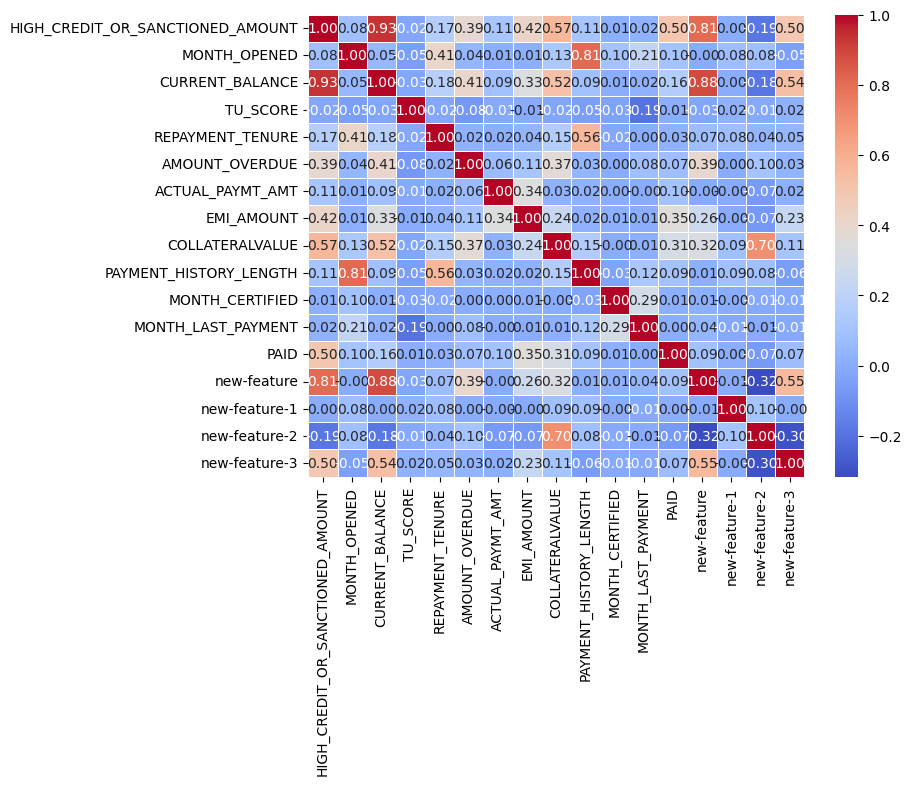

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical features
numerical_features = shuffled_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()


In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'TARGET_COLUMN' is your target variable
target_column = 'REPAYMENT_TENURE'

# Features and target for Personal Loans
X = shuffled_df.drop(columns=[target_column])
y = shuffled_df[target_column]

# Perform one-hot encoding for the "ACCOUNT_TYPE" column
X_encoded = pd.get_dummies(X, columns=['ACCOUNT_TYPE'],drop_first=True)



In [214]:
X_encoded

,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,TU_SCORE,AMOUNT_OVERDUE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,COLLATERALVALUE,PAYMENT_HISTORY_LENGTH,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,PAID,new-feature,new-feature-1,new-feature-2,new-feature-3,ACCOUNT_TYPE_Housing Loan,ACCOUNT_TYPE_Personal Loan,ACCOUNT_TYPE_Property Loan
0,1600000.0,102.0,1408044,662,769070.0,0.0,23420.0,1890000.0,36,42,73.0,191956.0,1.408044e+06,1.181250,290000.0,15458.937198,True,False,False
1,500000.0,46.0,387902,731,0.0,0.0,5361.0,1250000.0,26,-2,0.0,112098.0,3.879020e+05,2.500000,750000.0,10526.315789,True,False,False
2,1488000.0,7.0,1375083,729,0.0,0.0,28706.0,0.0,9,-2,0.0,112917.0,1.375083e+06,0.000000,-1488000.0,175058.823529,False,True,False
3,1087470.0,70.0,323818,774,0.0,2079.0,9581.0,2409000.0,36,0,0.0,763652.0,1.556817e+02,2.215234,1321530.0,15209.370629,True,False,False
4,1015604.0,18.0,750654,740,0.0,31998.0,31998.0,0.0,19,0,0.0,264950.0,2.345867e+01,0.000000,-1015604.0,52082.256410,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,798459.0,87.0,617671,707,0.0,11354.0,11354.0,4424222.0,36,0,0.0,180788.0,5.439639e+01,5.540951,3625763.0,9022.135593,False,False,True
98043,18000.0,3.0,15648,779,0.0,0.0,1011.0,0.0,5,-2,-1.0,2352.0,1.564800e+04,0.000000,-18000.0,4000.000000,False,True,False
98044,30000.0,5.0,10567,743,0.0,0.0,3900.0,0.0,8,-2,-2.0,19433.0,1.056700e+04,0.000000,-30000.0,4615.384615,False,True,False
98045,1103746.0,66.0,1045152,700,0.0,13609.0,13609.0,3017700.0,36,0,0.0,58594.0,7.679295e+01,2.734053,1913954.0,16351.792593,False,False,True


In [215]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.05, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Train LGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Train Linear Regression model

# Make predictions
xgb_predictions = xgb_model.predict(X_test)
lgbm_predictions = lgbm_model.predict(X_test)

# Evaluate models
def evaluate_model(predictions, model_name, model):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    train_r2 = model.score(X_train, y_train)
    print(f'{model_name}:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R2 Score (Test): {r2:.4f}')
    print(f'R2 Score (Train): {train_r2:.4f}')
    print('------------------------')

evaluate_model(xgb_predictions, 'XGBoost', xgb_model)
evaluate_model(lgbm_predictions, 'LGBM', lgbm_model)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3533
[LightGBM] [Info] Number of data points in the train set: 93120, number of used features: 19
[LightGBM] [Info] Start training from score 101.317193
XGBoost:
Mean Squared Error: 908.7835
R2 Score (Test): 0.9074
R2 Score (Train): 0.9378
------------------------
LGBM:
Mean Squared Error: 1021.6097
R2 Score (Test): 0.8959
R2 Score (Train): 0.9072
------------------------


In [185]:
X_encoded

,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,TU_SCORE,AMOUNT_OVERDUE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,COLLATERALVALUE,PAYMENT_HISTORY_LENGTH,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,PAID,new-feature,new-feature-1,new-feature-2,new-feature-3,ACCOUNT_TYPE_Business Loan,ACCOUNT_TYPE_Housing Loan,ACCOUNT_TYPE_Personal Loan,ACCOUNT_TYPE_Property Loan
0,1600000.0,102.0,1408044,662,769070.0,0.0,23420.0,1890000.0,36,42,73.0,191956.0,1.408044e+06,1.181250,290000.0,15458.937198,False,True,False,False
1,500000.0,46.0,387902,731,0.0,0.0,5361.0,1250000.0,26,-2,0.0,112098.0,3.879020e+05,2.500000,750000.0,10526.315789,False,True,False,False
2,1488000.0,7.0,1375083,729,0.0,0.0,28706.0,0.0,9,-2,0.0,112917.0,1.375083e+06,0.000000,-1488000.0,175058.823529,False,False,True,False
3,1087470.0,70.0,323818,774,0.0,2079.0,9581.0,2409000.0,36,0,0.0,763652.0,1.556817e+02,2.215234,1321530.0,15209.370629,False,True,False,False
4,1015604.0,18.0,750654,740,0.0,31998.0,31998.0,0.0,19,0,0.0,264950.0,2.345867e+01,0.000000,-1015604.0,52082.256410,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,798459.0,87.0,617671,707,0.0,11354.0,11354.0,4424222.0,36,0,0.0,180788.0,5.439639e+01,5.540951,3625763.0,9022.135593,False,False,False,True
98043,18000.0,3.0,15648,779,0.0,0.0,1011.0,0.0,5,-2,-1.0,2352.0,1.564800e+04,0.000000,-18000.0,4000.000000,False,False,True,False
98044,30000.0,5.0,10567,743,0.0,0.0,3900.0,0.0,8,-2,-2.0,19433.0,1.056700e+04,0.000000,-30000.0,4615.384615,False,False,True,False
98045,1103746.0,66.0,1045152,700,0.0,13609.0,13609.0,3017700.0,36,0,0.0,58594.0,7.679295e+01,2.734053,1913954.0,16351.792593,False,False,False,True


In [216]:
df=pd.read_csv('train_main_loan.csv')

In [217]:
df

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,DATE_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,...,TU_SCORE,PAYMENT_HISTORY_START_DATE,PAYMENT_HISTORY_END_DATE,DATE_REPORTED_AND_CERTIFIED,DATE_OF_LAST_PAYMENT,Reported_Date,DATE_OF_BIRTH,OCCUPATION_TYPE,GENDER,ACTUAL_ROI
0,A002338349,Housing Loan,818517,13-06-2014,640742,8627.0,8627.0,142.0,0,NaN,...,681,01-11-2023,01-12-2020,30-11-2023,30-11-2023,30-11-2023,21-05-1971,SALARIED,Male,12.32
1,A002000537,Housing Loan,1243755,05-12-2012,949446,500.0,12210.0,156.0,0,NaN,...,784,01-11-2023,01-12-2020,30-11-2023,30-11-2023,30-11-2023,12-11-1984,SALARIED,Female,12.42
2,A002421579,Housing Loan,1826422,16-03-2017,1296849,16036.0,16036.0,148.0,0,NaN,...,748,01-11-2023,01-12-2020,30-11-2023,11-11-2023,30-11-2023,01-08-1986,SALARIED,Male,10.87
3,A002152345,Housing Loan,1847916,24-12-2022,1724256,26996.0,NaN,NaN,0,NaN,...,786,01-11-2023,01-12-2022,30-11-2023,05-11-2023,30-11-2023,22-07-1969,NaN,Female,10.00
4,A001952834,Housing Loan,2318386,21-10-2014,1790937,25131.0,NaN,116.0,539,431551.0,...,664,01-11-2023,01-12-2020,30-11-2023,27-11-2023,30-11-2023,28-10-1974,SALARIED,Male,11.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,A000195582,Property Loan,2600000,15-03-2018,2381437,30762.0,30762.0,162.0,21,30762.0,...,744,01-11-2023,01-12-2020,30-11-2023,01-11-2023,30-11-2023,05-02-1989,SENP,Female,12.97
69954,A001735798,Business Loan,1016188,26-08-2022,790486,29851.0,NaN,48.0,0,NaN,...,673,01-11-2023,01-08-2022,30-11-2023,05-11-2023,30-11-2023,22-08-1992,NaN,Male,18.00
69955,A002435973,Business Loan,335475,22-03-2022,281106,10388.0,NaN,48.0,240,82468.0,...,567,01-11-2023,01-03-2022,30-11-2023,19-06-2023,30-11-2023,13-05-1987,NaN,Male,21.00
69956,A000027755,Housing Loan,1585160,12-09-2015,1255235,16739.0,NaN,143.0,0,NaN,...,798,01-11-2023,01-12-2020,30-11-2023,14-11-2023,30-11-2023,01-06-1971,SALARIED,Male,12.07


### the better estimate for the emi will be if the current last payment amount is less than the (principal) with intrest rate minnimum of that loan type with tenure maximum of that loan type then its a good estimation choose high or current using hit and trial

In [ ]:
shuffled_df['new-feature']=shuffled_df['CURRENT_BALANCE']/(shuffled_df['ACTUAL_PAYMT_AMT']+1)
shuffled_df['new-feature-1']=shuffled_df['COLLATERALVALUE']/(shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
shuffled_df['new-feature-2']=shuffled_df['COLLATERALVALUE']-(shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
shuffled_df['new-feature-3']=shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT']/(shuffled_df['MONTH_OPENED']+1.5)
shuffled_df['PAID']=shuffled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT']-shuffled_df['CURRENT_BALANCE']
wrangled_df['EMI_AMOUNT'] = wrangled_df['EMI_AMOUNT'].fillna(wrangled_df['ACTUAL_PAYMT_AMT'])


In [106]:
shuffled_df

,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,TU_SCORE,REPAYMENT_TENURE,ACCOUNT_TYPE,AMOUNT_OVERDUE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,COLLATERALVALUE,PAYMENT_HISTORY_LENGTH,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,PAID,new-feature,new-feature-1,new-feature-2,new-feature-3
0,1600000.0,102.0,1408044,662,123.0,Housing Loan,769070.0,0.0,23420.0,1890000.0,36,42,73.0,191956.0,1.408044e+06,1.181250,290000.0,15458.937198
1,500000.0,46.0,387902,731,156.0,Housing Loan,0.0,0.0,5361.0,1250000.0,26,-2,0.0,112098.0,3.879020e+05,2.500000,750000.0,10526.315789
2,1488000.0,7.0,1375083,729,72.0,Personal Loan,0.0,0.0,28706.0,0.0,9,-2,0.0,112917.0,1.375083e+06,0.000000,-1488000.0,175058.823529
3,1087470.0,70.0,323818,774,56.0,Housing Loan,0.0,2079.0,9581.0,2409000.0,36,0,0.0,763652.0,1.556817e+02,2.215234,1321530.0,15209.370629
4,1015604.0,18.0,750654,740,48.0,Business Loan - General,0.0,31998.0,31998.0,0.0,19,0,0.0,264950.0,2.345867e+01,0.000000,-1015604.0,52082.256410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,798459.0,87.0,617671,707,106.0,Property Loan,0.0,11354.0,11354.0,4424222.0,36,0,0.0,180788.0,5.439639e+01,5.540951,3625763.0,9022.135593
98043,18000.0,3.0,15648,779,24.0,Personal Loan,0.0,0.0,1011.0,0.0,5,-2,-1.0,2352.0,1.564800e+04,0.000000,-18000.0,4000.000000
98044,30000.0,5.0,10567,743,9.0,Personal Loan,0.0,0.0,3900.0,0.0,8,-2,-2.0,19433.0,1.056700e+04,0.000000,-30000.0,4615.384615
98045,1103746.0,66.0,1045152,700,175.0,Property Loan,0.0,13609.0,13609.0,3017700.0,36,0,0.0,58594.0,7.679295e+01,2.734053,1913954.0,16351.792593


In [218]:
def date_opened_to_month(df):
    # Convert 'DATE_OPENED' column to datetime
    df['DATE_OPENED'] = pd.to_datetime(df['DATE_OPENED'], format='%d-%m-%Y')  # Updated date format

    # Define the constant 'Reported_Date'
    constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')

    # Calculate the number of months until the constant_reported_date
    df['Months_Since_Opened'] = (constant_reported_date - df['DATE_OPENED']).dt.days // 30

    # Replace 'DATE_OPENED' with the calculated number of months
    df['DATE_OPENED'] = df['Months_Since_Opened']

    # Drop the 'Months_Since_Opened' column if you don't need it anymore
    df.drop(columns=['Months_Since_Opened'], inplace=True)
    
    # Rename 'DATE_OPENED' to 'MONTH_OPENED'
    df.rename(columns={'DATE_OPENED': 'MONTH_OPENED'}, inplace=True)

    return df

wrangled_df = date_opened_to_month(df)

In [219]:
def history_start_end_dates(df):
    # Convert 'PAYMENT_HISTORY_START_DATE' and 'PAYMENT_HISTORY_END_DATE' to datetime
    df['PAYMENT_HISTORY_START_DATE'] = pd.to_datetime(df['PAYMENT_HISTORY_START_DATE'], format='%d-%m-%Y')
    df['PAYMENT_HISTORY_END_DATE'] = pd.to_datetime(df['PAYMENT_HISTORY_END_DATE'], format='%d-%m-%Y')


    # Example operation: Calculate the number of months between 'PAYMENT_HISTORY_START_DATE' and a constant date
    constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')
    df['Months_Since_Payment_Start'] = (constant_reported_date - df['PAYMENT_HISTORY_START_DATE']).dt.days // 30

    # Replace 'PAYMENT_HISTORY_START_DATE' with the calculated number of months
    df['PAYMENT_HISTORY_START_DATE'] = df['Months_Since_Payment_Start']

    df.drop(columns=['Months_Since_Payment_Start'], inplace=True)

    df.rename(columns={'PAYMENT_HISTORY_START_DATE': 'MONTH_PAYMENT_HISTORY_START'}, inplace=True)

    
    df['Months_Since_Payment_End'] = (constant_reported_date - df['PAYMENT_HISTORY_END_DATE']).dt.days // 30

    df['PAYMENT_HISTORY_END_DATE'] = df['Months_Since_Payment_End']

    # Drop the 'Months_Since_Payment_End' column if you don't need it anymore
    df.drop(columns=['Months_Since_Payment_End'], inplace=True)

    # Rename 'PAYMENT_HISTORY_END_DATE' to 'MONTH_PAYMENT_HISTORY_END'
    df.rename(columns={'PAYMENT_HISTORY_END_DATE': 'MONTH_PAYMENT_HISTORY_END'}, inplace=True)

    return df

wrangled_df = history_start_end_dates(wrangled_df)


In [220]:
def date_of_last_payment(df):
  df['DATE_OF_LAST_PAYMENT'] = pd.to_datetime(df['DATE_OF_LAST_PAYMENT'], format='%d-%m-%Y')

  # Define the constant 'Reported_Date'
  constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')

  # Calculate the number of months
  df['Months_Since_Opened'] = (constant_reported_date - df['DATE_OF_LAST_PAYMENT']).dt.days // 30

  # Replace 'DATE_OPENED' with the calculated number of months
  df['DATE_OF_LAST_PAYMENT'] = df['Months_Since_Opened']

  # Drop the 'Months_Since_Opened' column if you don't need it anymore
  df.drop(columns=['Months_Since_Opened'], inplace=True)
  df.rename(columns={'DATE_OF_LAST_PAYMENT': 'MONTH_LAST_PAYMENT'}, inplace=True)

  return df

wrangled_df = date_of_last_payment(wrangled_df)


In [221]:
# wrangled_df['EMI_AMOUNT'] = wrangled_df['EMI_AMOUNT'].fillna(wrangled_df['ACTUAL_PAYMT_AMT'])


In [222]:
wrangled_df

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,...,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,DATE_REPORTED_AND_CERTIFIED,MONTH_LAST_PAYMENT,Reported_Date,DATE_OF_BIRTH,OCCUPATION_TYPE,GENDER,ACTUAL_ROI
0,A002338349,Housing Loan,818517,115,640742,8627.0,8627.0,142.0,0,NaN,...,681,0,36,30-11-2023,0.0,30-11-2023,21-05-1971,SALARIED,Male,12.32
1,A002000537,Housing Loan,1243755,133,949446,500.0,12210.0,156.0,0,NaN,...,784,0,36,30-11-2023,0.0,30-11-2023,12-11-1984,SALARIED,Female,12.42
2,A002421579,Housing Loan,1826422,81,1296849,16036.0,16036.0,148.0,0,NaN,...,748,0,36,30-11-2023,0.0,30-11-2023,01-08-1986,SALARIED,Male,10.87
3,A002152345,Housing Loan,1847916,11,1724256,26996.0,NaN,NaN,0,NaN,...,786,0,12,30-11-2023,0.0,30-11-2023,22-07-1969,NaN,Female,10.00
4,A001952834,Housing Loan,2318386,110,1790937,25131.0,NaN,116.0,539,431551.0,...,664,0,36,30-11-2023,0.0,30-11-2023,28-10-1974,SALARIED,Male,11.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,A000195582,Property Loan,2600000,69,2381437,30762.0,30762.0,162.0,21,30762.0,...,744,0,36,30-11-2023,0.0,30-11-2023,05-02-1989,SENP,Female,12.97
69954,A001735798,Business Loan,1016188,15,790486,29851.0,NaN,48.0,0,NaN,...,673,0,16,30-11-2023,0.0,30-11-2023,22-08-1992,NaN,Male,18.00
69955,A002435973,Business Loan,335475,20,281106,10388.0,NaN,48.0,240,82468.0,...,567,0,21,30-11-2023,5.0,30-11-2023,13-05-1987,NaN,Male,21.00
69956,A000027755,Housing Loan,1585160,100,1255235,16739.0,NaN,143.0,0,NaN,...,798,0,36,30-11-2023,0.0,30-11-2023,01-06-1971,SALARIED,Male,12.07


In [223]:
def date_certified_to_month(df):
  df['DATE_REPORTED_AND_CERTIFIED'] = pd.to_datetime(df['DATE_REPORTED_AND_CERTIFIED'], format='%d-%m-%Y')

  # Define the constant 'Reported_Date'
  constant_reported_date = pd.to_datetime('30-11-2023', format='%d-%m-%Y')

  # Calculate the number of months
  df['Months_Since_Opened'] = (constant_reported_date - df['DATE_REPORTED_AND_CERTIFIED']).dt.days // 30

  # Replace 'DATE_OPENED' with the calculated number of months
  df['DATE_REPORTED_AND_CERTIFIED'] = df['Months_Since_Opened']

  # Drop the 'Months_Since_Opened' column if you don't need it anymore
  df.drop(columns=['Months_Since_Opened'], inplace=True)
  df.rename(columns={'DATE_REPORTED_AND_CERTIFIED': 'MONTH_CERTIFIED'}, inplace=True)

  return df
wrangled_df=date_certified_to_month(wrangled_df)

In [224]:
wrangled_df

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,...,TU_SCORE,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,Reported_Date,DATE_OF_BIRTH,OCCUPATION_TYPE,GENDER,ACTUAL_ROI
0,A002338349,Housing Loan,818517,115,640742,8627.0,8627.0,142.0,0,NaN,...,681,0,36,0,0.0,30-11-2023,21-05-1971,SALARIED,Male,12.32
1,A002000537,Housing Loan,1243755,133,949446,500.0,12210.0,156.0,0,NaN,...,784,0,36,0,0.0,30-11-2023,12-11-1984,SALARIED,Female,12.42
2,A002421579,Housing Loan,1826422,81,1296849,16036.0,16036.0,148.0,0,NaN,...,748,0,36,0,0.0,30-11-2023,01-08-1986,SALARIED,Male,10.87
3,A002152345,Housing Loan,1847916,11,1724256,26996.0,NaN,NaN,0,NaN,...,786,0,12,0,0.0,30-11-2023,22-07-1969,NaN,Female,10.00
4,A001952834,Housing Loan,2318386,110,1790937,25131.0,NaN,116.0,539,431551.0,...,664,0,36,0,0.0,30-11-2023,28-10-1974,SALARIED,Male,11.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,A000195582,Property Loan,2600000,69,2381437,30762.0,30762.0,162.0,21,30762.0,...,744,0,36,0,0.0,30-11-2023,05-02-1989,SENP,Female,12.97
69954,A001735798,Business Loan,1016188,15,790486,29851.0,NaN,48.0,0,NaN,...,673,0,16,0,0.0,30-11-2023,22-08-1992,NaN,Male,18.00
69955,A002435973,Business Loan,335475,20,281106,10388.0,NaN,48.0,240,82468.0,...,567,0,21,0,5.0,30-11-2023,13-05-1987,NaN,Male,21.00
69956,A000027755,Housing Loan,1585160,100,1255235,16739.0,NaN,143.0,0,NaN,...,798,0,36,0,0.0,30-11-2023,01-06-1971,SALARIED,Male,12.07


In [225]:
wrangled_df['PAYMENT_HISTORY_LENGTH'] = abs(wrangled_df['MONTH_PAYMENT_HISTORY_END'] - wrangled_df['MONTH_PAYMENT_HISTORY_START'])

In [226]:
wrangled_df

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,...,MONTH_PAYMENT_HISTORY_START,MONTH_PAYMENT_HISTORY_END,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,Reported_Date,DATE_OF_BIRTH,OCCUPATION_TYPE,GENDER,ACTUAL_ROI,PAYMENT_HISTORY_LENGTH
0,A002338349,Housing Loan,818517,115,640742,8627.0,8627.0,142.0,0,NaN,...,0,36,0,0.0,30-11-2023,21-05-1971,SALARIED,Male,12.32,36
1,A002000537,Housing Loan,1243755,133,949446,500.0,12210.0,156.0,0,NaN,...,0,36,0,0.0,30-11-2023,12-11-1984,SALARIED,Female,12.42,36
2,A002421579,Housing Loan,1826422,81,1296849,16036.0,16036.0,148.0,0,NaN,...,0,36,0,0.0,30-11-2023,01-08-1986,SALARIED,Male,10.87,36
3,A002152345,Housing Loan,1847916,11,1724256,26996.0,NaN,NaN,0,NaN,...,0,12,0,0.0,30-11-2023,22-07-1969,NaN,Female,10.00,12
4,A001952834,Housing Loan,2318386,110,1790937,25131.0,NaN,116.0,539,431551.0,...,0,36,0,0.0,30-11-2023,28-10-1974,SALARIED,Male,11.97,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,A000195582,Property Loan,2600000,69,2381437,30762.0,30762.0,162.0,21,30762.0,...,0,36,0,0.0,30-11-2023,05-02-1989,SENP,Female,12.97,36
69954,A001735798,Business Loan,1016188,15,790486,29851.0,NaN,48.0,0,NaN,...,0,16,0,0.0,30-11-2023,22-08-1992,NaN,Male,18.00,16
69955,A002435973,Business Loan,335475,20,281106,10388.0,NaN,48.0,240,82468.0,...,0,21,0,5.0,30-11-2023,13-05-1987,NaN,Male,21.00,21
69956,A000027755,Housing Loan,1585160,100,1255235,16739.0,NaN,143.0,0,NaN,...,0,36,0,0.0,30-11-2023,01-06-1971,SALARIED,Male,12.07,36


In [227]:
wrangled_df['AMOUNT_OVERDUE'].fillna(0,inplace=True)
wrangled_df['ACTUAL_PAYMT_AMT'].fillna(0,inplace=True)
wrangled_df['COLLATERALVALUE'].fillna(0,inplace=True)
wrangled_df['MONTH_LAST_PAYMENT'].fillna(0,inplace=True)

In [228]:
wrangled_df.isna().sum()

ID                                      0
ACCOUNT_TYPE                            0
HIGH_CREDIT_OR_SANCTIONED_AMOUNT        0
MONTH_OPENED                            0
CURRENT_BALANCE                         0
ACTUAL_PAYMT_AMT                        0
EMI_AMOUNT                          49766
REPAYMENT_TENURE                    37176
LOAN_CLASSIFICATION                     0
AMOUNT_OVERDUE                          0
PAYMENT_HISTORY_1                       0
PAYMENT_HISTORY_2                   39673
OWNERSHIP_TYPE                          0
COLLATERALVALUE                         0
TU_SCORE                                0
MONTH_PAYMENT_HISTORY_START             0
MONTH_PAYMENT_HISTORY_END               0
MONTH_CERTIFIED                         0
MONTH_LAST_PAYMENT                      0
Reported_Date                           0
DATE_OF_BIRTH                           0
OCCUPATION_TYPE                     19113
GENDER                                  0
ACTUAL_ROI                        

In [229]:
wrangled_df['EMI_AMOUNT'] = wrangled_df['EMI_AMOUNT'].fillna(wrangled_df['ACTUAL_PAYMT_AMT'])

In [230]:
wrangled_df.isna().sum()

ID                                      0
ACCOUNT_TYPE                            0
HIGH_CREDIT_OR_SANCTIONED_AMOUNT        0
MONTH_OPENED                            0
CURRENT_BALANCE                         0
ACTUAL_PAYMT_AMT                        0
EMI_AMOUNT                              0
REPAYMENT_TENURE                    37176
LOAN_CLASSIFICATION                     0
AMOUNT_OVERDUE                          0
PAYMENT_HISTORY_1                       0
PAYMENT_HISTORY_2                   39673
OWNERSHIP_TYPE                          0
COLLATERALVALUE                         0
TU_SCORE                                0
MONTH_PAYMENT_HISTORY_START             0
MONTH_PAYMENT_HISTORY_END               0
MONTH_CERTIFIED                         0
MONTH_LAST_PAYMENT                      0
Reported_Date                           0
DATE_OF_BIRTH                           0
OCCUPATION_TYPE                     19113
GENDER                                  0
ACTUAL_ROI                        

In [151]:
selected_columns = ['HIGH_CREDIT_OR_SANCTIONED_AMOUNT', 'MONTH_OPENED', 'CURRENT_BALANCE', 'TU_SCORE','REPAYMENT_TENURE','ACCOUNT_TYPE','AMOUNT_OVERDUE','ACTUAL_PAYMT_AMT','EMI_AMOUNT','COLLATERALVALUE','PAYMENT_HISTORY_LENGTH','MONTH_CERTIFIED','MONTH_LAST_PAYMENT']



In [231]:
wrangled_df['new-feature'] = wrangled_df['CURRENT_BALANCE'] / (wrangled_df['ACTUAL_PAYMT_AMT'] + 1)
wrangled_df['new-feature-1'] = wrangled_df['COLLATERALVALUE'] / (wrangled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
wrangled_df['new-feature-2'] = wrangled_df['COLLATERALVALUE'] - (wrangled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'])
wrangled_df['new-feature-3'] = wrangled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT'] / (wrangled_df['MONTH_OPENED'] + 1.5)


In [232]:
wrangled_df['PAID']=wrangled_df['HIGH_CREDIT_OR_SANCTIONED_AMOUNT']-wrangled_df['CURRENT_BALANCE']


In [233]:
wrangled_df

,ID,ACCOUNT_TYPE,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,REPAYMENT_TENURE,LOAN_CLASSIFICATION,AMOUNT_OVERDUE,...,DATE_OF_BIRTH,OCCUPATION_TYPE,GENDER,ACTUAL_ROI,PAYMENT_HISTORY_LENGTH,new-feature,new-feature-1,new-feature-2,new-feature-3,PAID
0,A002338349,Housing Loan,818517,115,640742,8627.0,8627.0,142.0,0,0.0,...,21-05-1971,SALARIED,Male,12.32,36,74.263097,2.548512,1267483.0,7025.896996,177775
1,A002000537,Housing Loan,1243755,133,949446,500.0,12210.0,156.0,0,0.0,...,12-11-1984,SALARIED,Female,12.42,36,1895.101796,1.234970,292245.0,9247.249071,294309
2,A002421579,Housing Loan,1826422,81,1296849,16036.0,16036.0,148.0,0,0.0,...,01-08-1986,SALARIED,Male,10.87,36,80.866060,1.964332,1761278.0,22138.448485,529573
3,A002152345,Housing Loan,1847916,11,1724256,26996.0,26996.0,NaN,0,0.0,...,22-07-1969,NaN,Female,10.00,12,63.868430,1.650291,1201684.0,147833.280000,123660
4,A001952834,Housing Loan,2318386,110,1790937,25131.0,25131.0,116.0,539,431551.0,...,28-10-1974,SALARIED,Male,11.97,36,71.261221,1.201439,467014.0,20792.699552,527449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,A000195582,Property Loan,2600000,69,2381437,30762.0,30762.0,162.0,21,30762.0,...,05-02-1989,SENP,Female,12.97,36,77.412379,6.282692,13735000.0,36879.432624,218563
69954,A001735798,Business Loan,1016188,15,790486,29851.0,29851.0,48.0,0,0.0,...,22-08-1992,NaN,Male,18.00,16,26.480169,0.000000,-1016188.0,61587.151515,225702
69955,A002435973,Business Loan,335475,20,281106,10388.0,10388.0,48.0,240,82468.0,...,13-05-1987,NaN,Male,21.00,21,27.058042,0.000000,-335475.0,15603.488372,54369
69956,A000027755,Housing Loan,1585160,100,1255235,16739.0,16739.0,143.0,0,0.0,...,01-06-1971,SALARIED,Male,12.07,36,74.984170,5.997313,7921540.0,15617.339901,329925


In [234]:
columns_list = [
    'HIGH_CREDIT_OR_SANCTIONED_AMOUNT',
    'MONTH_OPENED',
    'CURRENT_BALANCE',
    'TU_SCORE',
    'ACCOUNT_TYPE',
    'AMOUNT_OVERDUE',
    'ACTUAL_PAYMT_AMT',
    'EMI_AMOUNT',
    'COLLATERALVALUE',
    'PAYMENT_HISTORY_LENGTH',
    'MONTH_CERTIFIED',
    'MONTH_LAST_PAYMENT',
    'PAID',
    'new-feature',
    'new-feature-1',
    'new-feature-2',
    'new-feature-3',
    'ACCOUNT_TYPE_Housing Loan','ACCOUNT_TYPE_Personal Loan','ACCOUNT_TYPE_Property Loan'
]

In [237]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'TARGET_COLUMN' is your target variable
target_column = 'REPAYMENT_TENURE'

# Features for prediction
X_nan = shuffled_df[shuffled_df[target_column].isna()].drop(columns=[target_column])

# Perform one-hot encoding for the "ACCOUNT_TYPE" column
X_nan_encoded = pd.get_dummies(X_nan, columns=['ACCOUNT_TYPE'],drop_first=True)

In [238]:
X_nan_encoded

,HIGH_CREDIT_OR_SANCTIONED_AMOUNT,MONTH_OPENED,CURRENT_BALANCE,TU_SCORE,AMOUNT_OVERDUE,ACTUAL_PAYMT_AMT,EMI_AMOUNT,COLLATERALVALUE,PAYMENT_HISTORY_LENGTH,MONTH_CERTIFIED,MONTH_LAST_PAYMENT,PAID,new-feature,new-feature-1,new-feature-2,new-feature-3


In [236]:


# Normalize the features using the same scaler used during training
X_nan_normalized = scaler.transform(X_nan_encoded)  # Assuming 'scaler' was previously defined during training

# Make predictions using your trained XGBoost model (assuming 'xgb_model' is already trained)
for index, nan_row in X_nan.iterrows():
    # Extract the features for the current NaN row (excluding the target column)
    features = [nan_row[column] for column in columns_list if column != target_column]
    
    # Make predictions for the current row
    prediction = xgb_model.predict([features])[0]
    
    # Fill the NaN value in 'REPAYMENT_TENURE' with the predicted value
    shuffled_df.at[index, target_column] = prediction

# Now 'shuffled_df' should have the NaN values in 'REPAYMENT_TENURE' filled with predictions from the XGBoost model


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ACCOUNT_TYPE_Housing Loan
- ACCOUNT_TYPE_Personal Loan
- ACCOUNT_TYPE_Property Loan
